<a href="https://colab.research.google.com/github/GSVarsha/AI-Mafia-Machine-Learning/blob/main/linearRegression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 (without sklearn)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_x = pd.read_csv('/content/drive/MyDrive/ML: Codes and Assignments/Week 2 - Assignments (Linear and Logistic Regression)/Linear Regression/Assignment 1/Training Data/Linear_X_Train.csv')

In [ ]:
df_y = pd.read_csv('/content/drive/MyDrive/ML: Codes and Assignments/Week 2 - Assignments (Linear and Logistic Regression)/Linear Regression/Assignment 1/Training Data/Linear_Y_Train.csv')

In [ ]:
x = df_x.values.flatten()
y = df_y.values.flatten()
print(x.shape, y.shape)

(3750,) (3750,)


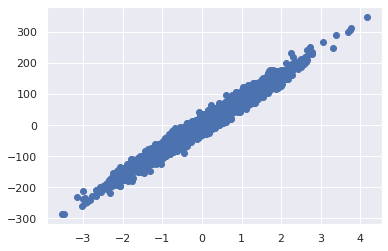

In [ ]:
import seaborn as sns
sns.set()
#plt.scatter(x, y)
x = (x - x.mean())/ x.std()
plt.scatter(x, y)
# plt.figure(figsize=(16, 8))

In [ ]:
def hypothesis(x, theta):
  return theta[0] + theta[1]*x # mx + c

def error(x, y, theta):
  m = x.shape[0]
  err = 0.0
  for i in range(m):
    hx = hypothesis(x[i], theta)
    err += (hx - y[i])**2
  return err/(2*m)

In [ ]:
def gradient(x, y, theta):
  grad = np.zeros((2,))   #grad --> dJ/dtheta
  m = x.shape[0]
  for i in range(m):
    hx = hypothesis(x[i], theta)
    grad[0] += (hx - y[i]) #dJ/dtheta[0]
    grad[1] += (hx - y[i])*x[i] #dJ/dtheta[1]
  return grad/m

def gradientDescent(x, y, learning_rate = 0.01):
  #random theta
  theta = np.array([-3.0, 0.0])

  max_iteration = 1000

  err_list = []
  theta_list = []

  for iter in range(max_iteration):
    grad = gradient(x, y, theta)
    err = error(x, y, theta)
    
    err_list.append(err)
    theta_list.append(theta)

    theta[0] -= learning_rate * grad[0]
    theta[1] -= learning_rate * grad[1]

  return theta, err_list, theta_list

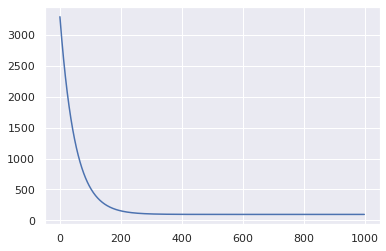

In [ ]:
final_theta, err_list, theta_list = gradientDescent(x, y)
plt.plot(err_list)

In [ ]:
final_theta

array([ 0.68370993, 79.90228731])

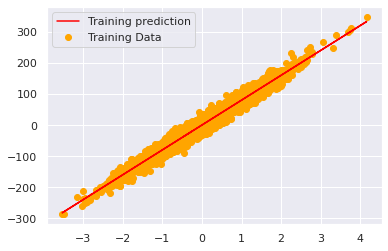

In [ ]:
plt.scatter(x,y, label='Training Data', color='orange')
plt.plot(x, hypothesis(x, final_theta), color='red', label='Training prediction')
plt.legend()

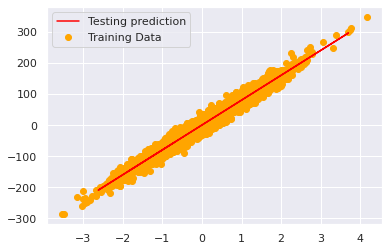

In [ ]:
df_x_test = pd.read_csv('/content/drive/MyDrive/ML: Codes and Assignments/Week 2 - Assignments (Linear and Logistic Regression)/Linear Regression/Assignment 1/Testing Data/Linear_X_Test.csv')
x_test = df_x_test.values.flatten()

plt.scatter(x, y, label='Training Data', color='orange')
plt.plot(x_test, hypothesis(x_test, final_theta), color='red', label='Testing prediction')
plt.legend()

# Assignment 2 (with sklearn)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/ML: Codes and Assignments/Week 2 - Assignments (Linear and Logistic Regression)/Linear Regression/Assignment 2/Training Data/Train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ML: Codes and Assignments/Week 2 - Assignments (Linear and Logistic Regression)/Linear Regression/Assignment 2/Testing Data/Test.csv')

In [ ]:
trainData = train_df.iloc[:, :-1]
trainLabels = train_df.iloc[:, -1]
testData = test_df

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#Train
model.fit(trainData, trainLabels)
#predict
predictions = model.predict(testData)

#bias/ intercept/ c
c = model.intercept_
#slope/ coeff
m = model.coef_

print(m, c)

[29.68187118 92.66247759  8.28062089 44.76773522  2.51916121] 4.990966735574954


In [ ]:
model.score(trainData, trainLabels)

0.9660939669975616